In [15]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def calc3colorsHist(image):
    
    chanels = cv2.split(image)
    hist = cv2.calcHist([chanels[0].astype(np.float32)], [0], None, [256], [0, 256])
    for chan in chanels[1:]:
            h = cv2.calcHist([chan.astype(np.float32)], [0], None, [256], [0, 256])
            hist = np.concatenate([hist, h], axis=-1)
            
    return hist

def correct(x_cur, cov_cur):
    global F
    global Q
    x_next = F * x_cur
    cov_next = F * cov_cur * F + Q
    
    return x_next, cov_next

def update(x, cov, data):
    # measurement update - correction
    
    global H
    global R

    K = H*cov/(H*cov*H + R)
    x = x + K*(data - H*x)
    cov = (1 - K*H)*cov   
    
    return x, cov

def hist3d(data_array):
    #
    # Create a figure for plotting the data as a 3D histogram.
    #
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #
    # Create an X-Y mesh of the same dimension as the 2D data. You can
    # think of this as the floor of the plot.
    #
    x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                                  np.arange(data_array.shape[0]) )
    #
    # Flatten out the arrays so that they may be passed to "ax.bar3d".
    # Basically, ax.bar3d expects three one-dimensional arrays:
    # x_data, y_data, z_data. The following call boils down to picking
    # one entry from each array and plotting a bar to from
    # (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
    #
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = data_array.flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              1, 1, z_data )
    #
    # Finally, display the plot.
    #
    plt.show()

In [91]:
IMAGE_FILE = './../data/input/images/frames_video1_short/thumb0035.jpg'
image_1 = cv2.imread(IMAGE_FILE)
IMAGE_FILE = './../data/input/images/frames_video1_short/thumb0036.jpg'
image_2 = cv2.imread(IMAGE_FILE)

hist_1 = calc3colorsHist(image_1)[1:-1]
hist_2 = calc3colorsHist(image_2)[1:-1]

F = 1
R = 1
Q = 0
H = 1
B = 0
x_cur = hist_1
cov = 0

x, cov = correct(hist_1, 0.1)
x, cov = update(x, cov, hist_2)

np.sqrt(np.divide(np.sum(np.power(np.subtract(hist_2, x), 2)), hist_2.shape[0])) / np.mean(hist_2)

0.10608478368155577

In [85]:
np.mean(hist_2)

3593.1104

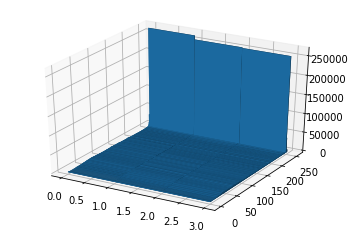

In [79]:
hist3d(hist_1)

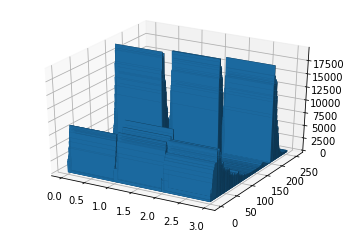

In [80]:
hist3d(hist_2)

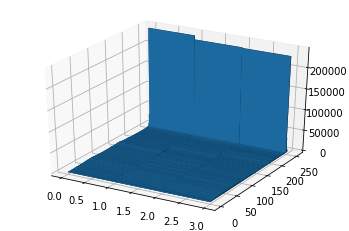

In [81]:
hist3d(x)